In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np


In [2]:
# S242 = pd.read_csv('data/output_EMA2233M10242_with_RSSI.csv')
S252 = pd.read_csv('data/output_EMA2233M10252_with_RSSI.csv')
S237 = pd.read_csv('data/output_EMA2233M10237_with_RSSI.csv')
S195 = pd.read_csv('data/output_EMA2233M10195_with_RSSI.csv')
S262 = pd.read_csv('data/output_EMA2233M10262_with_RSSI.csv')
S248 = pd.read_csv('data/output_EMA2233M10248_with_RSSI.csv')
S252 = S252.dropna()
S237 = S237.dropna()
S195 = S195.dropna()
S262 = S262.dropna()
S248 = S248.dropna()

### ADD ACTUAL DISTANCES TO DATAFRAME

In [3]:
# Dictionary of dataframes
sensor_data = {
    # 'S242': S242,
    'S252': S252,
    'S237': S237,
    'S195': S195,
    'S262': S262,
    'S248': S248
}

# Distance data for each sensor and terminal
distances = {
    'S252': {'TM066': 8.5, 'TM065': 13, 'TM063': 18},
    'S237': {'TM066': 21.7, 'TM065': 11.5, 'TM063': 27.4},
    'S195': {'TM066': 3, 'TM065': 19, 'TM063': 21},
    'S262': {'TM066': 30.7, 'TM065': 31.3, 'TM063': 14},
    'S248': {'TM066': 18.2, 'TM065': 9.5, 'TM063': 8.3}
}

# Add distance data to each dataframe
for sensor, df in sensor_data.items():
    for terminal, distance in distances[sensor].items():
        df[terminal + '_ACTUAL_DISTANCE'] = distance

# Combine all dataframes into one for analysis
combined_data = pd.concat(sensor_data.values(), ignore_index=True)
# Display the first few rows of the combined dataframe
combined_data.head()

,ID,OCCURRED_AT,DEVICE_ID,DATA,BROKER_ID,RSSI,TM066_RSSI,TM065_RSSI,TM063_RSSI,TM066_ACTUAL_DISTANCE,TM065_ACTUAL_DISTANCE,TM063_ACTUAL_DISTANCE
0,863722,2024-06-04 10:37:32,EMA2233M10252,SN=8383/CDATA/20240604102730/20240604103631/00...,EM-PL-TM066,"20240604103648/TM065,-50_TM066,-52_TM063,-53/",-52.0,-50.0,-53.0,8.5,13.0,18.0
1,863724,2024-06-04 10:47:32,EMA2233M10252,SN=8384/CDATA/20240604103730/20240604104631/00...,EM-PL-TM066,"20240604104648/TM066,-50_TM065,-50_TM063,-56/",-50.0,-50.0,-56.0,8.5,13.0,18.0
2,863732,2024-06-04 10:57:32,EMA2233M10252,SN=8385/CDATA/20240604104730/20240604105631/00...,EM-PL-TM066,"20240604105648/TM066,-49_TM065,-49_TM063,-56/",-49.0,-49.0,-56.0,8.5,13.0,18.0
3,863740,2024-06-04 11:07:32,EMA2233M10252,SN=8386/CDATA/20240604105730/20240604110632/00...,EM-PL-TM066,"20240604110648/TM066,-50_TM065,-51_TM063,-55/",-50.0,-51.0,-55.0,8.5,13.0,18.0
4,863746,2024-06-04 11:17:32,EMA2233M10252,SN=8387/CDATA/20240604110730/20240604111632/00...,EM-PL-TM066,"20240604111648/TM066,-47_TM065,-52_TM063,-55/",-47.0,-52.0,-55.0,8.5,13.0,18.0


In [4]:
# Define the calculate_distance function
def calculate_distance(rssi):
    n = 2.3
    P = -26  # dBm RSSI at 1 m distance
    distance = np.round(10**((P - float(rssi)) / (10 * n)),2)
    return distance
# Define the calculate_distance function
# def calculate_distance(rssi):
#     n = 2.1
#     P = -30  # dBm RSSI at 1 m distance
#     distance = np.round(10**((P - float(rssi)) / (10 * n)),2)
#     return distance
# def calculate_distance(rssi):
#     n = 2.8
#     P = -20  # dBm RSSI at 1 m distance
#     distance = np.round(10**((P - float(rssi)) / (10 * n)),2)
#     return distance


### Calculate distance based on RSSI

In [5]:
# Apply calculate_distance function to each RSSI column and store calculated distances
for column in ['TM066_RSSI', 'TM065_RSSI', 'TM063_RSSI']:
    combined_data[f'{column}_CALCULATED_DISTANCE'] = combined_data[column].apply(calculate_distance)

# Calculate average distance for each DEVICE_ID
average_distances = combined_data.groupby('DEVICE_ID').agg({
    'TM066_RSSI_CALCULATED_DISTANCE': 'mean',
    'TM065_RSSI_CALCULATED_DISTANCE': 'mean',
    'TM063_RSSI_CALCULATED_DISTANCE': 'mean'
}).reset_index()

# Calculate the overall average distance
overall_average_distance = average_distances[
    ['TM066_RSSI_CALCULATED_DISTANCE', 'TM065_RSSI_CALCULATED_DISTANCE', 'TM063_RSSI_CALCULATED_DISTANCE']
].mean(axis=1)

# Assign the overall average distances to new columns
average_distances['TM066_CALCULATED_AVG_DISTANCE'] = np.round(average_distances['TM066_RSSI_CALCULATED_DISTANCE'],2)
average_distances['TM065_CALCULATED_AVG_DISTANCE'] = np.round(average_distances['TM065_RSSI_CALCULATED_DISTANCE'],2)
average_distances['TM063_CALCULATED_AVG_DISTANCE'] = np.round(average_distances['TM063_RSSI_CALCULATED_DISTANCE'],2)

# Merge the average_distances DataFrame back to the original DataFrame based on DEVICE_ID
combined_data = pd.merge(combined_data, average_distances[['DEVICE_ID', 'TM066_CALCULATED_AVG_DISTANCE','TM065_CALCULATED_AVG_DISTANCE','TM063_CALCULATED_AVG_DISTANCE']], on='DEVICE_ID')
# x = combined_data[combined_data['DEVICE_ID']=='EMA2233M10252']

In [6]:
combined_data.head()

,ID,OCCURRED_AT,DEVICE_ID,DATA,BROKER_ID,RSSI,TM066_RSSI,TM065_RSSI,TM063_RSSI,TM066_ACTUAL_DISTANCE,TM065_ACTUAL_DISTANCE,TM063_ACTUAL_DISTANCE,TM066_RSSI_CALCULATED_DISTANCE,TM065_RSSI_CALCULATED_DISTANCE,TM063_RSSI_CALCULATED_DISTANCE,TM066_CALCULATED_AVG_DISTANCE,TM065_CALCULATED_AVG_DISTANCE,TM063_CALCULATED_AVG_DISTANCE
0,863722,2024-06-04 10:37:32,EMA2233M10252,SN=8383/CDATA/20240604102730/20240604103631/00...,EM-PL-TM066,"20240604103648/TM065,-50_TM066,-52_TM063,-53/",-52.0,-50.0,-53.0,8.5,13.0,18.0,13.50,11.05,14.92,10.24,11.3,19.31
1,863724,2024-06-04 10:47:32,EMA2233M10252,SN=8384/CDATA/20240604103730/20240604104631/00...,EM-PL-TM066,"20240604104648/TM066,-50_TM065,-50_TM063,-56/",-50.0,-50.0,-56.0,8.5,13.0,18.0,11.05,11.05,20.15,10.24,11.3,19.31
2,863732,2024-06-04 10:57:32,EMA2233M10252,SN=8385/CDATA/20240604104730/20240604105631/00...,EM-PL-TM066,"20240604105648/TM066,-49_TM065,-49_TM063,-56/",-49.0,-49.0,-56.0,8.5,13.0,18.0,10.00,10.00,20.15,10.24,11.3,19.31
3,863740,2024-06-04 11:07:32,EMA2233M10252,SN=8386/CDATA/20240604105730/20240604110632/00...,EM-PL-TM066,"20240604110648/TM066,-50_TM065,-51_TM063,-55/",-50.0,-51.0,-55.0,8.5,13.0,18.0,11.05,12.22,18.23,10.24,11.3,19.31
4,863746,2024-06-04 11:17:32,EMA2233M10252,SN=8387/CDATA/20240604110730/20240604111632/00...,EM-PL-TM066,"20240604111648/TM066,-47_TM065,-52_TM063,-55/",-47.0,-52.0,-55.0,8.5,13.0,18.0,8.19,13.50,18.23,10.24,11.3,19.31


In [7]:
asdasdasd

NameError: name 'asdasdasd' is not defined

In [8]:
df =combined_data

No intersection found for DEVICE_ID EMA2233M10252


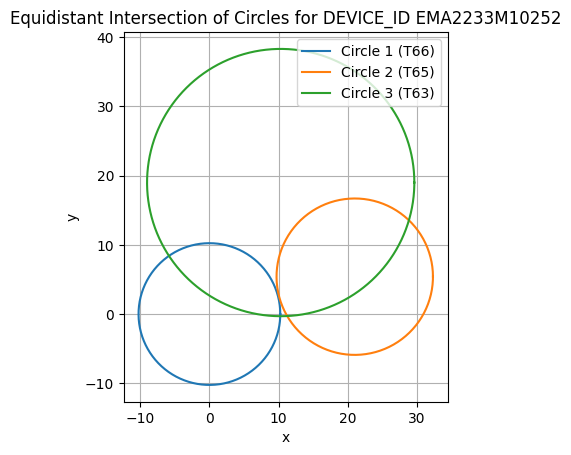

No intersection found for DEVICE_ID EMA2233M10237


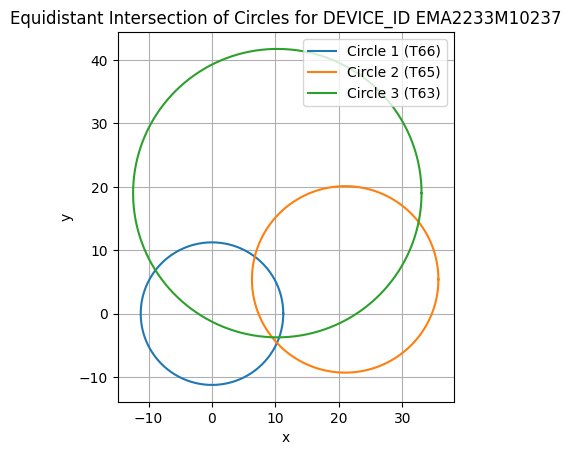

No intersection found for DEVICE_ID EMA2233M10195


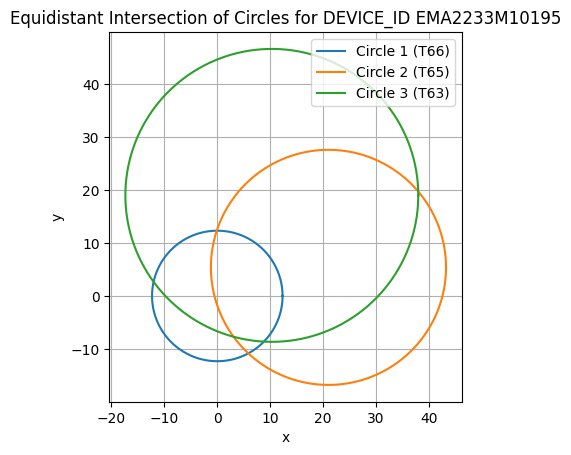

No intersection found for DEVICE_ID EMA2233M10262


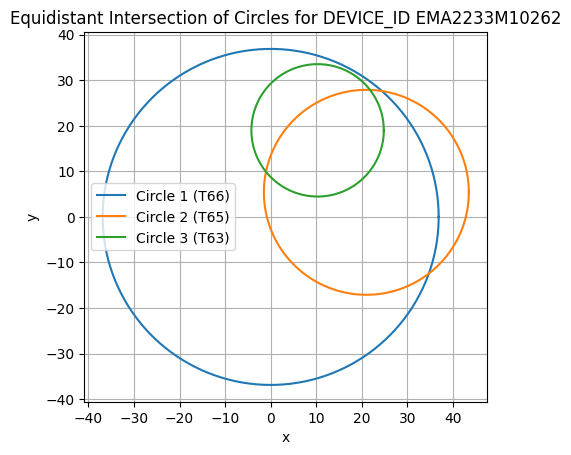

No intersection found for DEVICE_ID EMA2233M10248


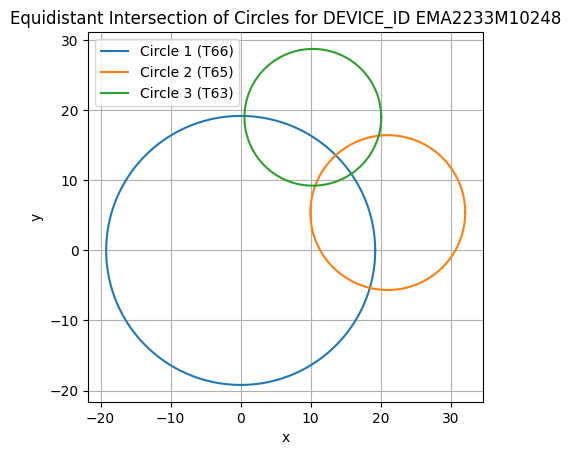

{}

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve

# Assuming you have the dataframe `df` already loaded in your environment

# Terminal coordinates
coordinates = {
    'T63': (10.3, 19),
    'T65': (21, 5.4),
    'T66': (0, 0)
}

# Define symbols
x, y = symbols('x y')

# Extract unique DEVICE_IDs
device_ids = df['DEVICE_ID'].unique()

# Dictionary to store solutions for each DEVICE_ID
solutions_dict = {}

for device_id in device_ids:
    # Filter dataframe for each DEVICE_ID
    df_device = df[df['DEVICE_ID'] == device_id]
    
    # Calculate mean distances
    r1 = df_device['TM066_CALCULATED_AVG_DISTANCE'].mean()
    r2 = df_device['TM065_CALCULATED_AVG_DISTANCE'].mean()
    r3 = df_device['TM063_CALCULATED_AVG_DISTANCE'].mean()
    
    # Circle centers
    x1, y1 = coordinates['T66']
    x2, y2 = coordinates['T65']
    x3, y3 = coordinates['T63']
    
    # Equations of the circles
    eq1 = Eq((x - x1)**2 + (y - y1)**2, r1**2)
    eq2 = Eq((x - x2)**2 + (y - y2)**2, r2**2)
    eq3 = Eq((x - x3)**2 + (y - y3)**2, r3**2)
    
    # Solve the system of equations
    solutions = solve((eq1, eq2, eq3), (x, y))
    
    # Initialize figure
    theta = np.linspace(0, 2 * np.pi, 300)
    fig, ax = plt.subplots()
    
    # Circle 1
    x_circle1 = r1 * np.cos(theta) + x1
    y_circle1 = r1 * np.sin(theta) + y1
    ax.plot(x_circle1, y_circle1, label='Circle 1 (T66)')
    
    # Circle 2
    x_circle2 = r2 * np.cos(theta) + x2
    y_circle2 = r2 * np.sin(theta) + y2
    ax.plot(x_circle2, y_circle2, label='Circle 2 (T65)')
    
    # Circle 3
    x_circle3 = r3 * np.cos(theta) + x3
    y_circle3 = r3 * np.sin(theta) + y3
    ax.plot(x_circle3, y_circle3, label='Circle 3 (T63)')
    
    if solutions:
        # Convert solution to numerical values
        numerical_solutions = [(float(sol[0]), float(sol[1])) for sol in solutions]
        
        # Calculate the equidistant point
        average_x = (x1 + x2 + x3) / 3
        average_y = (y1 + y2 + y3) / 3
        equidistant_point = min(numerical_solutions, key=lambda sol: np.sqrt((sol[0] - average_x)**2 + (sol[1] - average_y)**2))
        
        # Store the solution in the dictionary
        solutions_dict[device_id] = equidistant_point
        
        # Plot the intersection point(s)
        for sol in numerical_solutions:
            ax.plot(sol[0], sol[1], 'ro')  # Intersection points
        
        # Highlight the equidistant intersection point
        ax.plot(equidistant_point[0], equidistant_point[1], 'bo', markersize=10)  # Equidistant intersection point
        
        print(f'Equidistant solution for DEVICE_ID {device_id}: {equidistant_point}')
    else:
        print(f'No intersection found for DEVICE_ID {device_id}')
    
    ax.set_aspect('equal')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Equidistant Intersection of Circles for DEVICE_ID {device_id}')
    plt.grid(True)
    plt.show()

# Display all solutions
solutions_dict

Coordinates for DEVICE_ID EMA2233M10252: (10.81, -0.62)
Coordinates for DEVICE_ID EMA2233M10237: (9.92, -3.36)
Coordinates for DEVICE_ID EMA2233M10195: (4.71, -6.40)
Coordinates for DEVICE_ID EMA2233M10262: (23.92, 29.54)
Coordinates for DEVICE_ID EMA2233M10248: (14.01, 11.89)


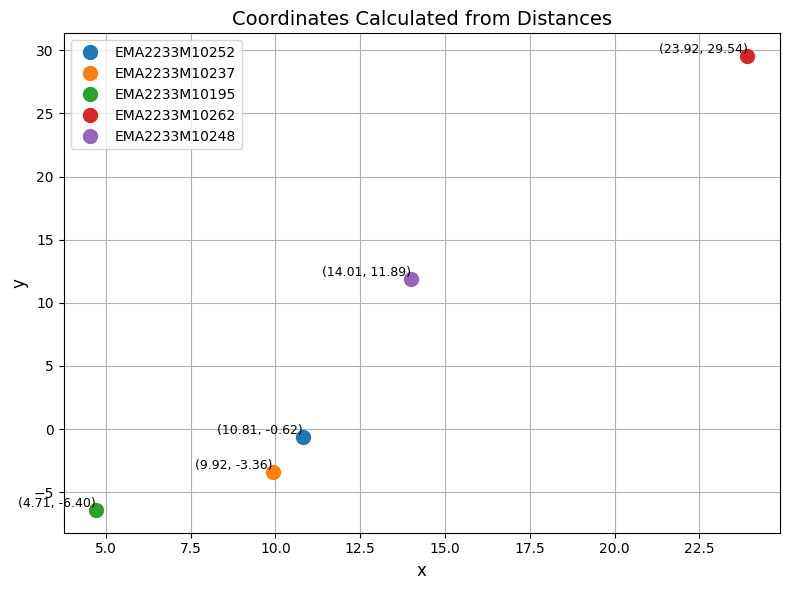

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols

# Function to calculate xy-coordinates from distances
def calculate_xy_from_distances(distances, beacon_positions):
    P = 2*(beacon_positions[1][0] - beacon_positions[0][0])
    Q = 2*(beacon_positions[1][1] - beacon_positions[0][1])
    R = distances[0]**2 - distances[1]**2 - beacon_positions[0][0]**2 + beacon_positions[1][0]**2 - beacon_positions[0][1]**2 + beacon_positions[1][1]**2

    S = 2*(beacon_positions[2][0] - beacon_positions[1][0])
    T = 2*(beacon_positions[2][1] - beacon_positions[1][1])
    U = distances[1]**2 - distances[2]**2 - beacon_positions[1][0]**2 + beacon_positions[2][0]**2 - beacon_positions[1][1]**2 + beacon_positions[2][1]**2

    x = (R*T - U*Q) / (P*T - Q*S)
    y = (R*S - P*U) / (Q*S - P*T)
    return x, y

# Example coordinates and distances
coordinates = {
    'TM063': (10.3, 19),
    'TM065': (21, 5.4),
    'TM066': (0, 0)
}

# Assume you have the dataframe `df` already loaded

# Define symbols
x, y = symbols('x y')

# Extract unique DEVICE_IDs
device_ids = df['DEVICE_ID'].unique()

# Dictionary to store solutions for each DEVICE_ID
solutions_dict = {}

plt.figure(figsize=(8, 6))  # Adjust figure size

for device_id in device_ids:
    df_device = df[df['DEVICE_ID'] == device_id]
    
    distances = [
        df_device['TM066_RSSI_CALCULATED_DISTANCE'].mean(),
        df_device['TM065_RSSI_CALCULATED_DISTANCE'].mean(),
        df_device['TM063_RSSI_CALCULATED_DISTANCE'].mean()
    ]
    
    beacon_positions = [
        coordinates['TM066'],
        coordinates['TM065'],
        coordinates['TM063']
    ]
    
    x_coord, y_coord = calculate_xy_from_distances(distances, beacon_positions)
    
    solutions_dict[device_id] = (x_coord, y_coord)
    
    # Adjust marker style and color
    plt.plot(x_coord, y_coord, 'o', markersize=10, label=device_id)  
    
    # Add text with adjusted alignment and size
    plt.text(x_coord, y_coord, f'({x_coord:.2f}, {y_coord:.2f})', fontsize=9, ha='right', va='bottom')  
    
    print(f'Coordinates for DEVICE_ID {device_id}: ({x_coord:.2f}, {y_coord:.2f})')

plt.xlabel('x', fontsize=12)  # Adjust label font size
plt.ylabel('y', fontsize=12)
plt.title('Coordinates Calculated from Distances', fontsize=14)  # Adjust title font size
plt.grid(True)
plt.legend(fontsize=10)  # Adjust legend font size
plt.tight_layout()  # Adjust layout
plt.show()


No intersection found for DEVICE_ID EMA2233M10252


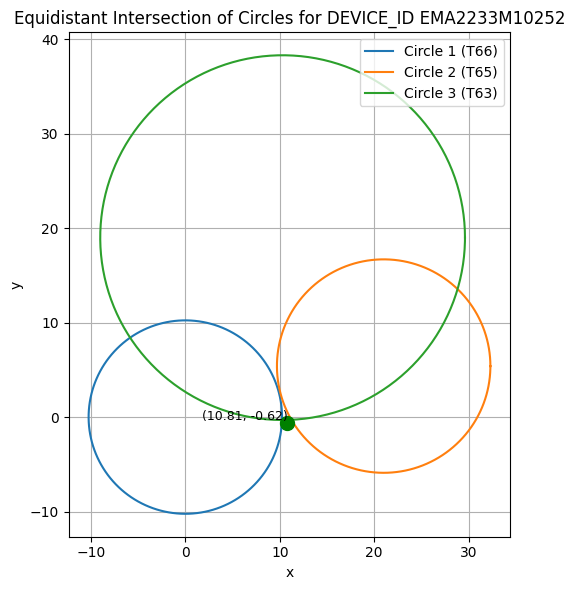

No intersection found for DEVICE_ID EMA2233M10237


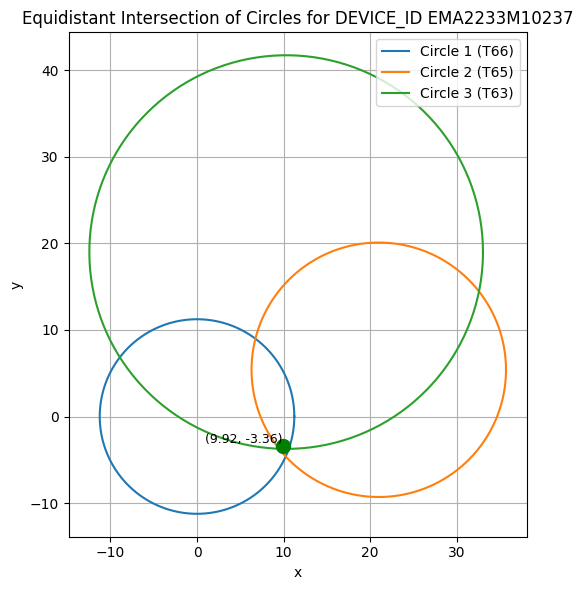

No intersection found for DEVICE_ID EMA2233M10195


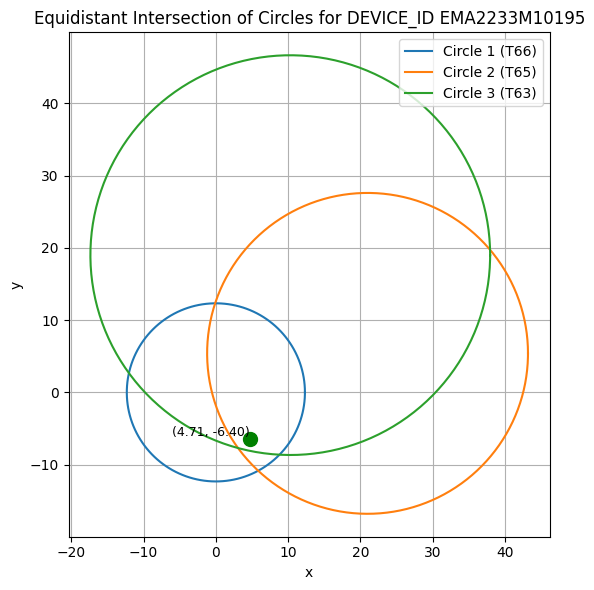

No intersection found for DEVICE_ID EMA2233M10262


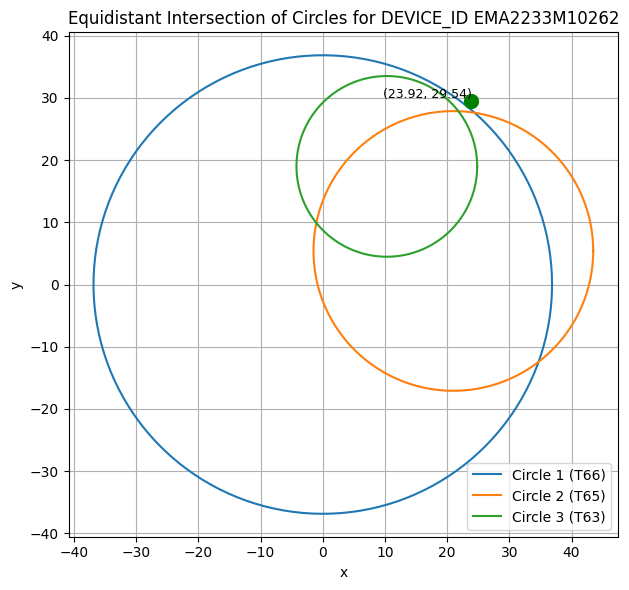

No intersection found for DEVICE_ID EMA2233M10248


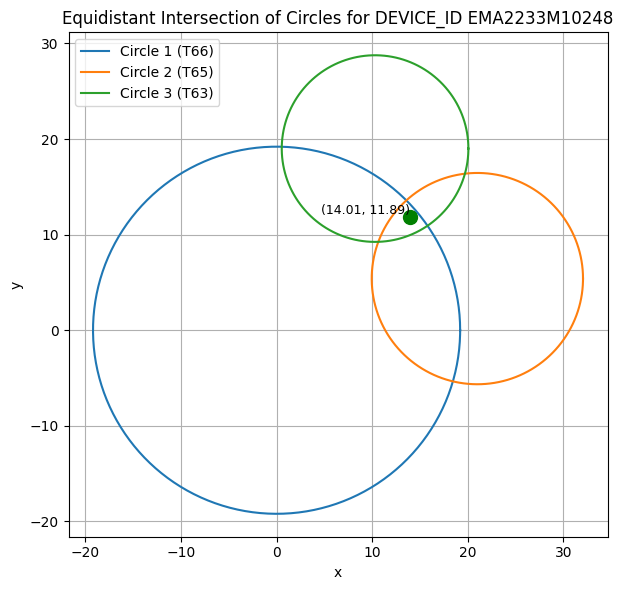

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve

# Assuming you have the dataframe `df` already loaded in your environment

# Terminal coordinates for the first method
coordinates1 = {
    'T63': (10.3, 19),
    'T65': (21, 5.4),
    'T66': (0, 0)
}

# Function to calculate xy-coordinates from distances for the second method
def calculate_xy_from_distances(distances, beacon_positions):
    P = 2*(beacon_positions[1][0] - beacon_positions[0][0])
    Q = 2*(beacon_positions[1][1] - beacon_positions[0][1])
    R = distances[0]**2 - distances[1]**2 - beacon_positions[0][0]**2 + beacon_positions[1][0]**2 - beacon_positions[0][1]**2 + beacon_positions[1][1]**2

    S = 2*(beacon_positions[2][0] - beacon_positions[1][0])
    T = 2*(beacon_positions[2][1] - beacon_positions[1][1])
    U = distances[1]**2 - distances[2]**2 - beacon_positions[1][0]**2 + beacon_positions[2][0]**2 - beacon_positions[1][1]**2 + beacon_positions[2][1]**2

    x = (R*T - U*Q) / (P*T - Q*S)
    y = (R*S - P*U) / (Q*S - P*T)
    return x, y

# Define symbols for the first method
x, y = symbols('x y')

# Extract unique DEVICE_IDs
device_ids = df['DEVICE_ID'].unique()

for device_id in device_ids:
    # Filter dataframe for each DEVICE_ID
    df_device = df[df['DEVICE_ID'] == device_id]
    
    # Method 1: Solve using equations of circles
    # Calculate mean distances
    r1 = df_device['TM066_CALCULATED_AVG_DISTANCE'].mean()
    r2 = df_device['TM065_CALCULATED_AVG_DISTANCE'].mean()
    r3 = df_device['TM063_CALCULATED_AVG_DISTANCE'].mean()
    
    # Circle centers
    x1, y1 = coordinates1['T66']
    x2, y2 = coordinates1['T65']
    x3, y3 = coordinates1['T63']
    
    # Equations of the circles
    eq1 = Eq((x - x1)**2 + (y - y1)**2, r1**2)
    eq2 = Eq((x - x2)**2 + (y - y2)**2, r2**2)
    eq3 = Eq((x - x3)**2 + (y - y3)**2, r3**2)
    
    # Solve the system of equations
    solutions = solve((eq1, eq2, eq3), (x, y))
    
    # Method 2: Calculate using distances
    distances = [
        df_device['TM066_RSSI_CALCULATED_DISTANCE'].mean(),
        df_device['TM065_RSSI_CALCULATED_DISTANCE'].mean(),
        df_device['TM063_RSSI_CALCULATED_DISTANCE'].mean()
    ]
    
    beacon_positions = [
        coordinates1['T66'],
        coordinates1['T65'],
        coordinates1['T63']
    ]
    
    x_coord, y_coord = calculate_xy_from_distances(distances, beacon_positions)
    
    # Plot results
    plt.figure(figsize=(8, 6))
    
    theta = np.linspace(0, 2 * np.pi, 300)
    plt.plot(x1 + r1 * np.cos(theta), y1 + r1 * np.sin(theta), label='Circle 1 (T66)')
    plt.plot(x2 + r2 * np.cos(theta), y2 + r2 * np.sin(theta), label='Circle 2 (T65)')
    plt.plot(x3 + r3 * np.cos(theta), y3 + r3 * np.sin(theta), label='Circle 3 (T63)')
    
    if solutions:
        numerical_solutions = [(float(sol[0]), float(sol[1])) for sol in solutions]
        for sol in numerical_solutions:
            plt.plot(sol[0], sol[1], 'ro')
        average_x = (x1 + x2 + x3) / 3
        average_y = (y1 + y2 + y3) / 3
        equidistant_point = min(numerical_solutions, key=lambda sol: np.sqrt((sol[0] - average_x)**2 + (sol[1] - average_y)**2))
        plt.plot(equidistant_point[0], equidistant_point[1], 'bo', markersize=10)
        print(f'Equidistant solution for DEVICE_ID {device_id}: {equidistant_point}')
    else:
        print(f'No intersection found for DEVICE_ID {device_id}')
    
    plt.plot(x_coord, y_coord, 'go', markersize=10)
    plt.text(x_coord, y_coord, f'({x_coord:.2f}, {y_coord:.2f})', fontsize=9, ha='right', va='bottom')
    
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Equidistant Intersection of Circles for DEVICE_ID {device_id}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
KFJASIDHASIDA

### VISUAL ANALYSIS OF RSSI VALUES FOR ALL SENSORS

In [ ]:
df = combined_data.sort_values('OCCURRED_AT')

# Convert OCCURRED_AT to datetime
df['OCCURRED_AT'] = pd.to_datetime(df['OCCURRED_AT'])

# Get unique DEVICE_ID values
device_ids = df['DEVICE_ID'].unique()

# Plotting
for device_id in device_ids:
    plt.figure(figsize=(12, 6))
    device_df = df[df['DEVICE_ID'] == device_id]
    plt.plot(device_df['OCCURRED_AT'], device_df['TM066_RSSI'], label='TM066_RSSI', marker='o')
    plt.plot(device_df['OCCURRED_AT'], device_df['TM065_RSSI'], label='TM065_RSSI', marker='o')
    plt.plot(device_df['OCCURRED_AT'], device_df['TM063_RSSI'], label='TM063_RSSI', marker='o')
    plt.xlabel('Occurred At')
    plt.ylabel('RSSI')
    plt.title(f'RSSI Signals Over Time for {device_id}')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
# # Plotting
# for device_id in device_ids:
#     plt.figure(figsize=(12, 6))
#     device_df = df[df['DEVICE_ID'] == device_id]
    
#     # Smooth out RSSI values using a moving average filter
#     # device_df['TM066_RSSI_smooth'] = device_df['TM066_RSSI'].rolling(window=5, min_periods=1).mean()
#     # device_df['TM065_RSSI_smooth'] = device_df['TM065_RSSI'].rolling(window=5, min_periods=1).mean()
#     # device_df['TM063_RSSI_smooth'] = device_df['TM063_RSSI'].rolling(window=5, min_periods=1).mean()
#     # device_df['TM066_RSSI'] = device_df['TM066_RSSI'].rolling(window=5, min_periods=1).mean()
#     # device_df['TM065_RSSI'] = device_df['TM065_RSSI'].rolling(window=5, min_periods=1).mean()
#     # device_df['TM063_RSSI'] = device_df['TM063_RSSI'].rolling(window=5, min_periods=1).mean()
#     # Plot smoothed RSSI values
#     plt.plot(device_df['OCCURRED_AT'], device_df['TM066_RSSI'], label='TM066_RSSI_smooth', marker='o')
#     plt.plot(device_df['OCCURRED_AT'], device_df['TM065_RSSI'], label='TM065_RSSI_smooth', marker='o')
#     plt.plot(device_df['OCCURRED_AT'], device_df['TM063_RSSI'], label='TM063_RSSI_smooth', marker='o')
    
#     plt.xlabel('Occurred At')
#     plt.ylabel('Smoothed RSSI')
#     plt.title(f'Smoothed RSSI Signals Over Time for {device_id}')
#     plt.legend()
#     plt.grid(True)
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for each terminal
terminals = ['TM066', 'TM065', 'TM063']
for terminal in terminals:
    plt.figure()
    sns.scatterplot(x=combined_data[terminal + 'ACTUAL_DISTANCE'], y=combined_data[terminal + '_RSSI'])
    plt.title(f'RSSI vs Distance for {terminal}')
    plt.xlabel('Distance (m)')
    plt.ylabel('RSSI (dBm)')
    plt.show()

# Average all values for each terminal according to DEVICE_ID
plt.figure()
for terminal in terminals:
    avg_data = combined_data.groupby('DEVICE_ID')[[terminal + 'ACTUAL_DISTANCE', terminal + '_RSSI']].mean().reset_index()
    sns.scatterplot(x=avg_data[terminal + 'ACTUAL_DISTANCE'], y=avg_data[terminal + '_RSSI'], label=terminal)
    plt.title('Average RSSI vs Distance for Each Terminal')
    plt.xlabel('Distance (m)')
    plt.ylabel('RSSI (dBm)')
    plt.legend()
    plt.show()


In [ ]:
# Plot RSSI vs Distance for each terminal on the same plot
for terminal in terminals:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=combined_data[terminal + 'ACTUAL_DISTANCE'], y=combined_data[terminal + '_RSSI'], hue=combined_data['DEVICE_ID'], palette='viridis', legend=None)
    plt.title(f'RSSI vs Distance for {terminal}')
    plt.xlabel('Distance (m)')
    plt.ylabel('RSSI (dBm)')
    plt.grid(True)
    plt.show()

In [ ]:
# Perform linear regression to find the relationship
for terminal in terminals:
    X = combined_data[terminal + 'ACTUAL_DISTANCE'].values.reshape(-1, 1)
    y = combined_data[terminal + '_RSSI'].values
    reg = LinearRegression().fit(X, y)
    slope = reg.coef_[0]
    intercept = reg.intercept_
    print(f'Relationship for {terminal}: RSSI = {slope:.2f} * Distance + {intercept:.2f}')

In [ ]:
def plot_avg_rssi_vs_distance_and_regression(data, terminal):
    # Group by distance and calculate the mean RSSI
    avg_data = data.groupby(terminal + 'ACTUAL_DISTANCE')[terminal + '_RSSI'].mean().reset_index()

    # Perform linear regression
    X = avg_data[terminal + 'ACTUAL_DISTANCE'].values.reshape(-1, 1)
    y = avg_data[terminal + '_RSSI'].values
    reg = LinearRegression().fit(X, y)
    slope = reg.coef_[0]
    intercept = reg.intercept_
    print(f'Relationship for {terminal}: RSSI = {slope:.2f} * Distance + {intercept:.2f}')

# Plot and perform regression for each terminal
for terminal in terminals:
    plot_avg_rssi_vs_distance_and_regression(combined_data, terminal)